In [1]:
import os, sys
sys.path.append(os.path.abspath("../src/tf"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from datetime import datetime as dt
from gan import MnistCWGAN
from tensorflow.keras.utils import to_categorical


%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
W0721 18:46:13.575146 140537079682880 deprecation_wrapper.py:119] From /home/michal/Projects/gan/src/tf/gan.py:14: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [3]:
run_name = dt.now().strftime("cwgangp_%y%m%d%H%M%S")

# TODO:
* ~~mount data as a volume~~
* ~~save/restore model~~
* use docker compose
* generalize code to other datasets
* generalize train method in GAN class

In [5]:
mnist = np.load("/data/mnist.npz")
x_train, y_train, x_test, y_test = mnist["x_train"], mnist["y_train"], mnist["x_test"], mnist["y_test"]
x_train, x_test = x_train / 128.0 - 1, x_test / 128.0 - 1
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]


In [6]:
tf.reset_default_graph()

In [9]:
sess = tf.Session()
gan = MnistCWGAN(sess, learning_rate=0.0001, name=run_name)
writer = tf.summary.FileWriter('/logs/{}'.format(run_name), sess.graph)

In [10]:
train_size = 1000
cond = to_categorical(y_train[:train_size])
x = x_train[:train_size]
    

In [11]:
gan.train([x, cond], 10, 64, writer)

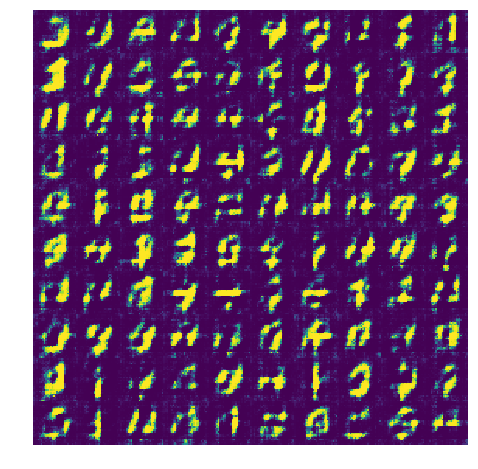

In [12]:
noise = np.random.normal(0, 1, (100, 64))
conditions = to_categorical(
    np.concatenate([np.arange(10) for _ in range(10)]))

images = gan.generate([noise, conditions])

plt.figure(figsize=(10, 8))
plt.imshow(np.concatenate(
    np.concatenate(
        images.reshape(10, 10, 28, 28),
        axis=1
    ),
    axis=1
))
plt.axis("off")
plt.show()

In [13]:
gan.save("models/{}.ckpt".format(run_name))